In [1]:
import importlib
 
if importlib.util.find_spec('fsspec') is None:
  !pip install fsspec
if importlib.util.find_spec('s3fs') is None:
  !pip install s3fs

     |████████████████████████████████| 102kB 4.4MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 1.3MB 8.8MB/s 
     |████████████████████████████████| 6.5MB 28.2MB/s 
     |████████████████████████████████| 143kB 55.6MB/s 
     |████████████████████████████████| 296kB 49.8MB/s 
     |████████████████████████████████| 552kB 57.9MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=e84df005709bad171ad9032c53aa4d5bfa4b6dd6e8b71118b487fb9271a7110b
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
from sklearn.neighbors import KernelDensity

Reading the data

In [4]:
data = pd.read_csv('s3://lfspf/CoCo.csv')
CoCo =  data['yield'].values
CoCo = CoCo.reshape(-1,1)

TopHat Kernel

In [5]:
kde = KernelDensity(kernel='tophat')
kde.fit(CoCo)

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
              kernel='tophat', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

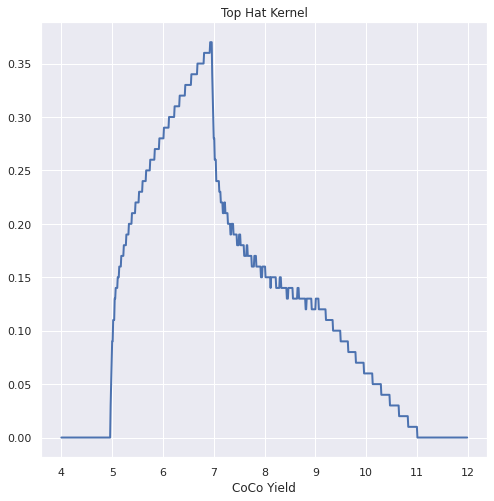

In [6]:
fig = plt.figure(figsize=(8,8))
x= np.arange(4,12,0.01)
x=x.reshape(-1,1)
log_dens = kde.score_samples(x)
log_dens = log_dens.reshape(-1,1)
plt.plot(x, np.exp(log_dens),linewidth=2)
plt.xlabel('CoCo Yield');
plt.title('Top Hat Kernel');

Gaussian Kernel with $\lambda=1$

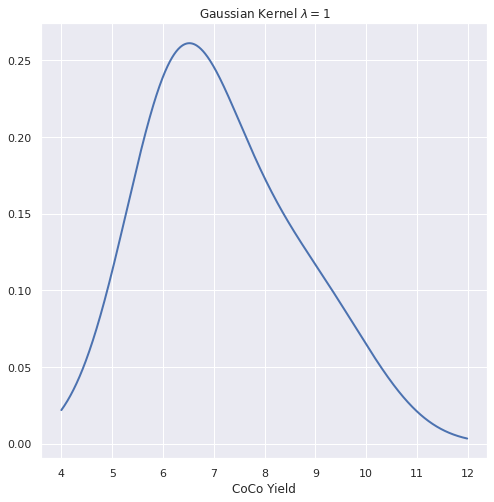

In [7]:
fig = plt.figure(figsize=(8,8))
kde = KernelDensity(kernel='gaussian',bandwidth=1)
kde.fit(CoCo)
x= np.arange(4,12,0.01)
x=x.reshape(len(x),1)
log_dens = kde.score_samples(x)
log_dens = log_dens[:,np.newaxis]
plt.plot(x, np.exp(log_dens),linewidth=2);
plt.xlabel('CoCo Yield');
plt.title('Gaussian Kernel $\lambda =1$');

Create kernel density for different bandwidths :
$[1.0,2.0,3.0]$

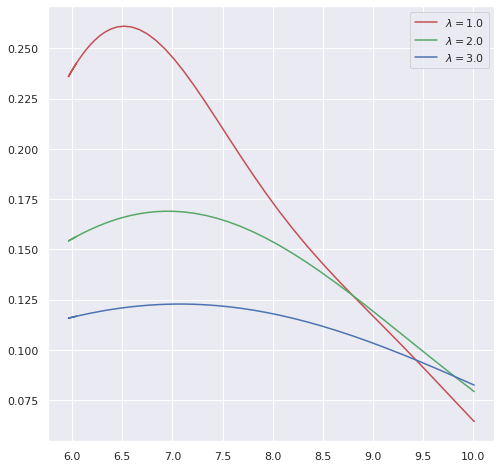

In [8]:
fig = plt.figure(figsize=(8,8))
bw = np.array([1.0,2,3])
i=0
color = ['r','g','b']
for b in bw:
    kde =KernelDensity(kernel='gaussian',bandwidth=b)
    kde.fit(CoCo)
    plt.plot(CoCo,np.exp(kde.score_samples(CoCo)),color[i],label='$\lambda=$'+str(b))
    i+=1
plt.legend();
    

Finding the probability that yield between 7 and 8.<br>
The kernel can be used as random number generator.

In [9]:
bw = np.array([1,2,3])
for b in bw:
    kde =KernelDensity(kernel='gaussian',bandwidth=b)
    kde.fit(CoCo)
    v=kde.sample(n_samples=1000)
    print('Bandwidth' + str(b))
    print('Prob=' + str(sum((v<8)&(v>7))/len(v)))

Bandwidth1
Prob=[0.211]
Bandwidth2
Prob=[0.123]
Bandwidth3
Prob=[0.129]


<h3>Finding the optimal bandwidth</h3>

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param = {'bandwidth':np.arange(0.01,3,0.005)}
grid= GridSearchCV(KernelDensity(),param)
grid.fit(CoCo)

GridSearchCV(cv=None, error_score=nan,
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bandwidth': array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0....
       2.755, 2.76 , 2.765, 2.77 , 2.775, 2.78 , 2.785, 2.79 , 2.795,
       2.8  , 2.805, 2.81 , 2.815, 2.82 , 2.825, 2.83 , 2.835, 2.84 ,
       2.845, 2.85 , 2.855, 2.86 , 2.865, 2.87 , 2.875, 2.88 , 2.885,
       2.89 , 2.895, 2.9  , 2.905, 2.91 , 2.915, 2.92 , 2.925, 2.93 ,
       2.935, 2.94 , 2.945, 2.95 , 2.955, 2.96 , 2.965, 2.97 , 2.975,
       2.98 , 2.985, 2.99 , 2.995])},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [12]:
grid.best_estimator_.bandwidth

1.3249999999999997